In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [31]:
#changing directory
os.chdir("C:\\Users\\shive\\Desktop\\MS-BAIM\\Courses\\online courses\\A-Z Deep Learning\\Deep_Learning_A_Z\\Volume 2 - Unsupervised Deep Learning\\Part 4 - Self Organizing Maps (SOM)\\Section 16 - Building a SOM\\Self_Organizing_Maps")

# Importing data and initializing SOM

In [32]:
#importing the dataset
dataset= pd.read_csv("Credit_Card_Applications.csv")
dataset.head(5)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [33]:
x= dataset.iloc[:, :-1].values
y= dataset.iloc[:, -1].values #extracting approved, not approved data
x[:5]

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, 1.1460000e+01,
        2.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.5850000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, 7.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, 1.7500000e+00,
        1.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.2500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 1.0000000e+00],
       [1.5687688e+07, 0.0000000e+00, 2.1670000e+01, 1.1500000e+01,
        1.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.1000000e+01, 1.0000000e+00,
        2.0000000e+00,

In [34]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range= (0,1))
x= sc.fit_transform(x)
x[:5]

array([[0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
        0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.05      , 0.01212   ],
       [0.69609056, 0.        , 0.13413534, 0.25      , 0.5       ,
        0.53846154, 0.375     , 0.00578947, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.08      , 0.        ],
       [0.38898166, 0.        , 0.23804511, 0.0625    , 0.        ,
        0.23076923, 0.375     , 0.04385965, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.14      , 0.        ],
       [0.48842545, 0.        , 0.11909774, 0.41071429, 0.        ,
        0.30769231, 0.25      , 0.        , 1.        , 1.        ,
        0.1641791 , 1.        , 0.5       , 0.        , 0.        ],
       [0.60079526, 1.        , 0.09654135, 0.29178571, 0.5       ,
        0.38461538, 0.375     , 0.06877193, 1.        , 1.        ,
        0.20895522, 0.        , 0.5       , 

In [35]:
#Training the SOM
from minisom import MiniSom #importing available minisom class 

In [36]:
#Training the SOM
som= MiniSom(x=10, y=10, input_len= 15, learning_rate= 0.5, sigma=1.0)
som.random_weights_init(x)
som.train_random(data= x, num_iteration=100)

# Visualizing the results

In [37]:
from pylab import bone, pcolor, colorbar, plot, show

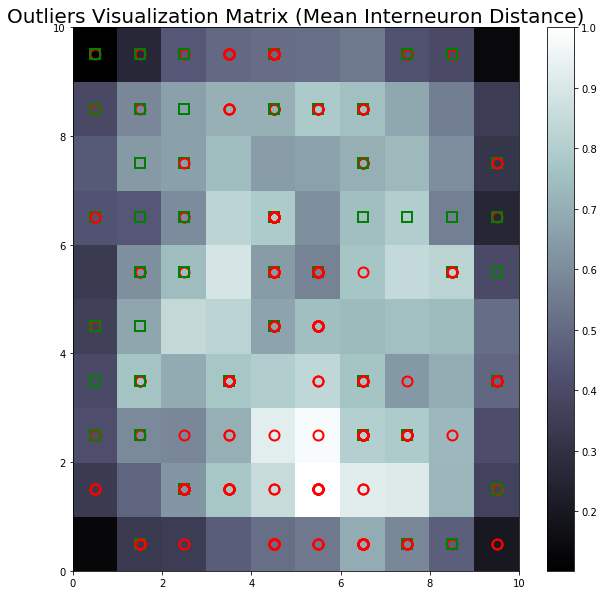

In [54]:
plt.figure(figsize=(10,10))
bone()# intializing the figure area
pcolor(som.distance_map().T) #getting MID(Mean Internueron distance for all customers)
colorbar() #adding labels for the MID normalized value
markers= ["o", "s"] # initializing circular and square shape of markers
colors= ["r", "g"] # initializing red and green color of markers
for i, a in enumerate(x):
    w= som.winner(a) #getting winning node for each customer
    plot(w[0]+ 0.5,
         w[1]+ 0.5,
         markers[y[i]],
         markeredgecolor= colors[y[i]],
         markerfacecolor= 'None',
         markersize=10,
         markeredgewidth= 2)
plt.title("Outliers Visualization Matrix (Mean Interneuron Distance)", fontsize= 20)
show()


# Finding the Frauds

In [45]:
mappings= som.win_map(x) #identifying coordinates of each neuron and corresponding list of customers
frauds= np.concatenate((mappings[(5,1)], mappings[(5,2)]), axis=0)
frauds= sc.inverse_transform(frauds)

In [49]:
fraud_customers= pd.DataFrame(frauds)

In [50]:
fraud_customers

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15594305.0,0.0,23.75,0.710,2.0,9.0,4.0,0.250,0.0,1.0,1.0,1.0,2.0,240.0,5.0
1,15664793.0,0.0,17.33,9.500,2.0,6.0,4.0,1.750,0.0,1.0,10.0,1.0,2.0,0.0,11.0
2,15763579.0,0.0,16.00,0.165,2.0,6.0,4.0,1.000,0.0,1.0,2.0,1.0,2.0,320.0,2.0
3,15662189.0,0.0,28.58,3.750,2.0,8.0,4.0,0.250,0.0,1.0,1.0,1.0,2.0,40.0,155.0
4,15568469.0,0.0,15.83,7.625,2.0,11.0,4.0,0.125,0.0,1.0,1.0,1.0,2.0,0.0,161.0
5,15782159.0,0.0,22.67,0.750,2.0,8.0,4.0,2.000,0.0,1.0,2.0,1.0,2.0,200.0,395.0
6,15717700.0,0.0,23.58,0.830,2.0,11.0,4.0,0.415,0.0,1.0,1.0,1.0,2.0,200.0,12.0
7,15705379.0,0.0,30.58,10.665,2.0,11.0,8.0,0.085,0.0,1.0,12.0,1.0,2.0,129.0,4.0
8,15646535.0,0.0,17.92,0.540,2.0,8.0,4.0,1.750,0.0,1.0,1.0,1.0,2.0,80.0,6.0
9,15749964.0,0.0,27.58,3.000,2.0,7.0,4.0,2.790,0.0,1.0,1.0,1.0,2.0,280.0,11.0


In [51]:
for col in dataset.columns:
    print(col)

CustomerID
A1
A2
A3
A4
A5
A6
A7
A8
A9
A10
A11
A12
A13
A14
Class


In [52]:
fraud_customers.columns= ["CustomerID","A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14"] #adding respective column names

In [53]:
fraud_customers

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15594305.0,0.0,23.75,0.710,2.0,9.0,4.0,0.250,0.0,1.0,1.0,1.0,2.0,240.0,5.0
1,15664793.0,0.0,17.33,9.500,2.0,6.0,4.0,1.750,0.0,1.0,10.0,1.0,2.0,0.0,11.0
2,15763579.0,0.0,16.00,0.165,2.0,6.0,4.0,1.000,0.0,1.0,2.0,1.0,2.0,320.0,2.0
3,15662189.0,0.0,28.58,3.750,2.0,8.0,4.0,0.250,0.0,1.0,1.0,1.0,2.0,40.0,155.0
4,15568469.0,0.0,15.83,7.625,2.0,11.0,4.0,0.125,0.0,1.0,1.0,1.0,2.0,0.0,161.0
5,15782159.0,0.0,22.67,0.750,2.0,8.0,4.0,2.000,0.0,1.0,2.0,1.0,2.0,200.0,395.0
6,15717700.0,0.0,23.58,0.830,2.0,11.0,4.0,0.415,0.0,1.0,1.0,1.0,2.0,200.0,12.0
7,15705379.0,0.0,30.58,10.665,2.0,11.0,8.0,0.085,0.0,1.0,12.0,1.0,2.0,129.0,4.0
8,15646535.0,0.0,17.92,0.540,2.0,8.0,4.0,1.750,0.0,1.0,1.0,1.0,2.0,80.0,6.0
9,15749964.0,0.0,27.58,3.000,2.0,7.0,4.0,2.790,0.0,1.0,1.0,1.0,2.0,280.0,11.0
